# Emsebling Image and Caption mdoel resutls during prediction time

In [62]:
import numpy as np
import ast
from sklearn.metrics import f1_score
import hecutils.plotting_utils as pt
import hecutils.image_utils as imut

None


## Image prediction results

In [43]:
#image {-1: 0, 0: 1, 1: 2}
image_predictions_str = """[[4.06438321e-01 3.75951409e-01 2.17610255e-01]
 [8.39015603e-01 1.40345052e-01 2.06392929e-02]
 [3.40413243e-01 3.47366393e-01 3.12220365e-01]
 [2.56693482e-01 3.56134087e-01 3.87172431e-01]
 [7.56033421e-01 1.96194842e-01 4.77717854e-02]
 [7.95658052e-01 8.32337290e-02 1.21108159e-01]
 [3.43861520e-01 2.51189888e-01 4.04948592e-01]
 [9.83463824e-01 1.50752757e-02 1.46089005e-03]
 [2.43710279e-02 1.16732053e-01 8.58896971e-01]
 [5.47655225e-01 3.68741393e-01 8.36033523e-02]
 [2.16934774e-02 1.10199861e-01 8.68106604e-01]
 [3.82714033e-01 3.51056635e-01 2.66229302e-01]
 [2.32070848e-01 6.04017496e-01 1.63911641e-01]
 [3.65532041e-02 9.63386953e-01 5.98452680e-05]
 [3.17507297e-01 5.93525648e-01 8.89671296e-02]
 [3.33246559e-01 3.60683888e-01 3.06069553e-01]
 [1.78416520e-01 5.32629967e-01 2.88953453e-01]
 [3.81809510e-02 3.35280478e-01 6.26538515e-01]
 [3.80685985e-01 3.01170856e-01 3.18143189e-01]
 [8.02613888e-03 9.91774797e-01 1.99009679e-04]
 [4.64497536e-01 4.20396894e-01 1.15105614e-01]
 [3.12309831e-01 3.77747953e-01 3.09942245e-01]
 [7.04746664e-01 2.74325520e-01 2.09277719e-02]
 [4.96113658e-01 3.93950284e-01 1.09936036e-01]
 [1.77136868e-01 4.93497342e-01 3.29365820e-01]
 [2.26763085e-01 4.52529162e-01 3.20707768e-01]
 [1.00033738e-01 1.92535058e-01 7.07431257e-01]
 [2.01057956e-01 4.10094529e-01 3.88847500e-01]
 [4.63609844e-02 6.49004504e-02 8.88738573e-01]
 [1.73089907e-01 5.00645459e-01 3.26264590e-01]
 [4.44632530e-01 4.32187021e-01 1.23180427e-01]
 [1.24696540e-04 9.96453285e-01 3.42199905e-03]
 [1.97992235e-01 3.74506176e-01 4.27501619e-01]
 [6.21188462e-01 2.01457232e-01 1.77354276e-01]
 [2.37564817e-01 5.63057482e-01 1.99377730e-01]
 [8.37505737e-04 9.05811906e-01 9.33505818e-02]
 [7.73129314e-02 3.37020755e-01 5.85666358e-01]
 [9.96151641e-02 7.52442300e-01 1.47942603e-01]
 [8.71706158e-02 4.26301599e-01 4.86527741e-01]
 [2.67609537e-01 4.07992482e-01 3.24397922e-01]
 [4.71738130e-01 3.56468201e-01 1.71793699e-01]
 [8.44564848e-03 2.92770296e-01 6.98784053e-01]
 [9.54068545e-03 2.58645952e-01 7.31813312e-01]
 [2.85630710e-02 9.67835426e-01 3.60158831e-03]
 [3.68057354e-03 9.88165975e-01 8.15339200e-03]
 [1.33370966e-01 8.63092124e-01 3.53694940e-03]
 [4.81459349e-02 3.80325794e-01 5.71528256e-01]
 [2.67435879e-01 3.40713620e-01 3.91850471e-01]
 [1.25645936e-01 3.07399958e-01 5.66954076e-01]
 [1.23706106e-02 9.79309678e-01 8.31971504e-03]
 [5.09445310e-01 3.57047915e-01 1.33506805e-01]
 [1.86129153e-01 3.81082982e-01 4.32787865e-01]
 [4.87860888e-01 2.97246546e-01 2.14892522e-01]
 [1.44666538e-01 6.20563686e-01 2.34769806e-01]
 [2.49010324e-01 4.62841094e-01 2.88148612e-01]
 [5.25654119e-04 9.93481517e-01 5.99291082e-03]
 [5.80372036e-01 3.45463037e-01 7.41648674e-02]
 [1.21630482e-01 3.47317904e-01 5.31051636e-01]
 [1.98715597e-01 3.11069787e-01 4.90214527e-01]
 [1.55706748e-01 4.02433038e-01 4.41860199e-01]
 [1.18406221e-01 3.99356127e-01 4.82237667e-01]
 [1.32199690e-01 3.22390705e-01 5.45409620e-01]
 [9.16179717e-02 2.16899440e-01 6.91482544e-01]
 [8.23501274e-02 3.52492839e-01 5.65156996e-01]
 [9.60716419e-03 1.95414081e-01 7.94978738e-01]
 [2.41771936e-01 3.75047892e-01 3.83180141e-01]
 [3.17211333e-03 4.44905497e-02 9.52337325e-01]
 [1.10931255e-01 2.22127050e-01 6.66941643e-01]
 [7.57317618e-02 1.57489628e-01 7.66778648e-01]
 [5.08985333e-02 2.30632260e-01 7.18469203e-01]
 [2.64405817e-01 3.35294902e-01 4.00299311e-01]
 [1.48145080e-01 2.37102687e-01 6.14752233e-01]
 [1.66783780e-01 2.89687485e-01 5.43528736e-01]
 [6.79932460e-02 1.27737120e-01 8.04269671e-01]
 [1.42254459e-03 1.02237603e-02 9.88353729e-01]
 [2.40460038e-02 4.65052724e-02 9.29448664e-01]
 [1.95034459e-01 3.97349805e-01 4.07615751e-01]
 [3.71652618e-02 2.34228462e-01 7.28606284e-01]
 [2.71354476e-03 2.79151853e-02 9.69371200e-01]
 [3.42158191e-02 2.23503694e-01 7.42280483e-01]
 [6.15679612e-03 7.91310668e-02 9.14712131e-01]
 [1.07031530e-02 1.96205229e-01 7.93091655e-01]
 [2.11362004e-01 3.25633049e-01 4.63004917e-01]
 [2.19877392e-01 2.99260199e-01 4.80862409e-01]
 [1.52254505e-02 3.78938317e-02 9.46880758e-01]
 [9.59938690e-02 3.51615071e-01 5.52391052e-01]
 [2.30228841e-01 3.14293295e-01 4.55477923e-01]
 [2.73462310e-02 2.13801175e-01 7.58852541e-01]
 [1.35380236e-04 2.24718708e-03 9.97617424e-01]
 [4.08774577e-02 1.73446625e-01 7.85675883e-01]]"""

image_predictions_str = image_predictions_str[1:len(image_predictions_str)-1]
image_predictions = []
for pred in image_predictions_str.split("\n"):
    pred = pred.strip()
    pred = pred.replace(" ",",")
    pred = ast.literal_eval(pred)
    pred = np.array(pred, dtype=float)
    image_predictions.append(pred)

image_predictions = np.array(image_predictions)     
print(image_predictions)

[[4.06438321e-01 3.75951409e-01 2.17610255e-01]
 [8.39015603e-01 1.40345052e-01 2.06392929e-02]
 [3.40413243e-01 3.47366393e-01 3.12220365e-01]
 [2.56693482e-01 3.56134087e-01 3.87172431e-01]
 [7.56033421e-01 1.96194842e-01 4.77717854e-02]
 [7.95658052e-01 8.32337290e-02 1.21108159e-01]
 [3.43861520e-01 2.51189888e-01 4.04948592e-01]
 [9.83463824e-01 1.50752757e-02 1.46089005e-03]
 [2.43710279e-02 1.16732053e-01 8.58896971e-01]
 [5.47655225e-01 3.68741393e-01 8.36033523e-02]
 [2.16934774e-02 1.10199861e-01 8.68106604e-01]
 [3.82714033e-01 3.51056635e-01 2.66229302e-01]
 [2.32070848e-01 6.04017496e-01 1.63911641e-01]
 [3.65532041e-02 9.63386953e-01 5.98452680e-05]
 [3.17507297e-01 5.93525648e-01 8.89671296e-02]
 [3.33246559e-01 3.60683888e-01 3.06069553e-01]
 [1.78416520e-01 5.32629967e-01 2.88953453e-01]
 [3.81809510e-02 3.35280478e-01 6.26538515e-01]
 [3.80685985e-01 3.01170856e-01 3.18143189e-01]
 [8.02613888e-03 9.91774797e-01 1.99009679e-04]
 [4.64497536e-01 4.20396894e-01 1.151056

## Caption prediction results

In [54]:
# caption class_to_index {0: 0, -1: 1, 1: 2}
caption_predictions_str = """[[3.05e-01 2.49e-01 4.46e-01]
 [7.46e-02 8.27e-03 9.17e-01]
 [5.25e-01 3.45e-02 4.40e-01]
 [7.04e-01 2.73e-01 2.30e-02]
 [8.35e-01 3.91e-02 1.26e-01]
 [5.21e-01 4.71e-01 8.50e-03]
 [4.68e-01 1.78e-03 5.30e-01]
 [8.74e-01 3.95e-03 1.22e-01]
 [2.22e-02 9.68e-04 9.77e-01]
 [8.65e-01 3.03e-02 1.04e-01]
 [5.13e-02 9.18e-04 9.48e-01]
 [4.77e-01 4.64e-01 5.94e-02]
 [8.84e-01 8.81e-02 2.80e-02]
 [9.20e-02 9.00e-01 8.11e-03]
 [3.57e-01 4.35e-01 2.07e-01]
 [9.05e-01 4.43e-03 9.09e-02]
 [1.83e-01 1.52e-03 8.16e-01]
 [3.68e-02 6.58e-04 9.63e-01]
 [9.03e-03 2.77e-04 9.91e-01]
 [8.32e-01 1.25e-01 4.28e-02]
 [1.16e-01 2.76e-03 8.81e-01]
 [1.94e-01 2.74e-03 8.03e-01]
 [2.29e-01 3.57e-02 7.35e-01]
 [3.13e-01 1.41e-01 5.46e-01]
 [1.59e-01 2.56e-03 8.38e-01]
 [7.67e-01 1.88e-01 4.57e-02]
 [4.00e-01 4.79e-01 1.21e-01]
 [5.86e-02 2.10e-03 9.39e-01]
 [2.28e-01 3.75e-02 7.34e-01]
 [2.11e-01 7.10e-01 7.89e-02]
 [1.77e-01 6.32e-04 8.22e-01]
 [5.34e-01 1.92e-01 2.73e-01]
 [1.35e-01 8.52e-01 1.33e-02]
 [5.62e-01 3.77e-01 6.07e-02]
 [4.23e-01 2.90e-01 2.87e-01]
 [2.67e-01 2.18e-01 5.15e-01]
 [6.34e-01 2.26e-01 1.40e-01]
 [1.01e-02 1.28e-03 9.89e-01]
 [3.62e-01 2.04e-03 6.36e-01]
 [3.12e-01 6.61e-01 2.70e-02]
 [4.32e-01 4.58e-02 5.23e-01]
 [2.84e-01 7.11e-03 7.09e-01]
 [6.82e-01 2.28e-01 9.00e-02]
 [9.00e-01 4.97e-02 5.01e-02]
 [8.34e-01 8.51e-02 8.14e-02]
 [8.45e-01 8.95e-02 6.54e-02]
 [6.90e-01 2.87e-01 2.30e-02]
 [3.45e-01 4.93e-01 1.62e-01]
 [3.14e-01 3.09e-01 3.77e-01]
 [8.94e-01 8.43e-02 2.21e-02]
 [3.44e-01 6.16e-01 4.01e-02]
 [8.77e-01 9.19e-02 3.11e-02]
 [8.85e-01 3.00e-02 8.52e-02]
 [2.28e-02 7.80e-04 9.76e-01]
 [1.94e-01 3.45e-02 7.71e-01]
 [5.92e-01 8.25e-03 3.99e-01]
 [9.30e-01 5.34e-03 6.49e-02]
 [2.06e-01 4.25e-03 7.90e-01]
 [2.45e-01 8.01e-03 7.47e-01]
 [8.39e-01 1.38e-01 2.25e-02]
 [7.64e-01 1.70e-01 6.64e-02]
 [2.94e-01 4.21e-01 2.85e-01]
 [6.54e-01 2.74e-01 7.23e-02]
 [8.79e-01 7.24e-02 4.84e-02]
 [8.78e-01 1.14e-01 8.88e-03]
 [8.56e-01 4.61e-02 9.80e-02]
 [9.74e-01 2.17e-03 2.36e-02]
 [2.27e-01 7.61e-02 6.97e-01]
 [9.05e-02 1.37e-03 9.08e-01]
 [3.89e-01 6.02e-01 9.18e-03]
 [9.93e-01 4.04e-03 2.52e-03]
 [2.62e-02 1.88e-03 9.72e-01]
 [3.90e-01 1.62e-03 6.08e-01]
 [1.73e-01 2.04e-03 8.25e-01]
 [1.53e-02 7.19e-04 9.84e-01]
 [5.96e-01 2.09e-01 1.95e-01]
 [8.18e-01 1.31e-01 5.12e-02]
 [1.03e-01 1.18e-03 8.96e-01]
 [1.91e-02 5.57e-04 9.80e-01]
 [5.34e-01 4.40e-01 2.58e-02]
 [9.19e-01 6.46e-02 1.69e-02]
 [3.27e-01 6.87e-02 6.04e-01]
 [1.46e-02 2.67e-04 9.85e-01]
 [5.15e-01 1.30e-01 3.55e-01]
 [8.94e-01 1.22e-02 9.37e-02]
 [2.53e-01 2.92e-01 4.54e-01]
 [3.93e-02 2.84e-03 9.58e-01]
 [8.34e-01 9.12e-02 7.48e-02]
 [5.40e-01 3.58e-01 1.01e-01]
 [2.30e-01 1.66e-02 7.53e-01]]"""

#caption class_to_index {0: 0, -1: 1, 1: 2}
# Convert to image {-1: 0, 0: 1, 1: 2}
caption_predictions_str = caption_predictions_str[1:len(caption_predictions_str)-1]
caption_predictions = []
for pred in caption_predictions_str.split("\n"):
    pred = pred.strip()
    pred = pred.replace(" ",",")
    pred = ast.literal_eval(pred)
    # Make index of classes match to image one: {-1: 0, 0: 1, 1: 2}
    predSwitched = []
    predSwitched.append(pred[1])
    predSwitched.append(pred[0])
    predSwitched.append(pred[2])
    pred = np.array(predSwitched, dtype=float)
    caption_predictions.append(predSwitched)

caption_predictions = np.array(caption_predictions)    
print(caption_predictions)

[[2.49e-01 3.05e-01 4.46e-01]
 [8.27e-03 7.46e-02 9.17e-01]
 [3.45e-02 5.25e-01 4.40e-01]
 [2.73e-01 7.04e-01 2.30e-02]
 [3.91e-02 8.35e-01 1.26e-01]
 [4.71e-01 5.21e-01 8.50e-03]
 [1.78e-03 4.68e-01 5.30e-01]
 [3.95e-03 8.74e-01 1.22e-01]
 [9.68e-04 2.22e-02 9.77e-01]
 [3.03e-02 8.65e-01 1.04e-01]
 [9.18e-04 5.13e-02 9.48e-01]
 [4.64e-01 4.77e-01 5.94e-02]
 [8.81e-02 8.84e-01 2.80e-02]
 [9.00e-01 9.20e-02 8.11e-03]
 [4.35e-01 3.57e-01 2.07e-01]
 [4.43e-03 9.05e-01 9.09e-02]
 [1.52e-03 1.83e-01 8.16e-01]
 [6.58e-04 3.68e-02 9.63e-01]
 [2.77e-04 9.03e-03 9.91e-01]
 [1.25e-01 8.32e-01 4.28e-02]
 [2.76e-03 1.16e-01 8.81e-01]
 [2.74e-03 1.94e-01 8.03e-01]
 [3.57e-02 2.29e-01 7.35e-01]
 [1.41e-01 3.13e-01 5.46e-01]
 [2.56e-03 1.59e-01 8.38e-01]
 [1.88e-01 7.67e-01 4.57e-02]
 [4.79e-01 4.00e-01 1.21e-01]
 [2.10e-03 5.86e-02 9.39e-01]
 [3.75e-02 2.28e-01 7.34e-01]
 [7.10e-01 2.11e-01 7.89e-02]
 [6.32e-04 1.77e-01 8.22e-01]
 [1.92e-01 5.34e-01 2.73e-01]
 [8.52e-01 1.35e-01 1.33e-02]
 [3.77e-01

## Calculate Predictions by averaging image and caption predictions

In [64]:
# print(caption_predictions[:3])
# print(image_predictions[:3])
# print("\n")
#============= label_map_from_train_gen  {'negative': 0, 'neutral': 1, 'positive': 2}  =================
#image {-1: 0, 0: 1, 1: 2}
#caption class_to_index {0: 0, -1: 1, 1: 2}
class_to_index = {0: 0, -1: 1, 1: 2}
predictions = np.add(caption_predictions, image_predictions) / 2.0
y_pred = imut.conver_predictions_to_classes(predictions, class_to_index)
print(y_pred)

[-1, 1, -1, -1, -1, 0, 1, 0, 1, -1, 1, 0, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 0, 1, -1, 0, 0, -1, -1, -1, 1, 1, 0, -1, 1, -1, -1, -1, -1, -1, 0, 1, -1, 0, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1]


## True labels

In [12]:
# TODO:
# Fix mismatch here !!!

y_true_caption= [0, 1, 1, 0, 0, -1, 0, 1, 1, 1, 1, 0, 0, 0, 1, -1, -1, 1, 0, 1, 1, 1, 1, 1, -1, 0, 1, 1, 0, 1, -1, -1, -1, 1, 0, -1, -1, 0, -1, 0, 0, 0, -1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, -1, 1, 1, 1, 0, 0, -1, 1, 0, 0, 0, 1, 0, -1, 0, 1, 1, 0, 0]
y_true_image = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# Image
test_filenames ['-1/Car accident 1.jpg', '-1/Dead bodies 3.jpg', '-1/Depressed pose 3.jpg', '-1/Dog 31.jpg', '-1/Frustrated pose 1.jpg', '-1/Frustrated pose 2.jpg', '-1/Funeral 1.jpg', '-1/Gun 9.jpg', '-1/Hangover 1.jpg', '-1/KKK rally 2.jpg', '-1/Miserable pose 5.jpg', '-1/Sad pose 3.jpg', '-1/Shot 4.jpg', '-1/Sidewalk 6.jpg', '-1/Soldiers 7.jpg', '-1/Tornado 3.jpg', '0/Alcohol 7.jpg', '0/BDSM 3.jpg', '0/Bird 5.jpg', '0/Bricks 1.jpg', '0/Camping 8.jpg', '0/Camping 9.jpg', '0/Child labor 1.jpg', '0/Crosswalk 1.jpg', '0/Cups 1.jpg', '0/Cups 4.jpg', '0/Doctor 3.jpg', '0/Fire hydrant 1.jpg', '0/Food 1.jpg', '0/Graveyard 1.jpg', '0/House 1.jpg', '0/Lightning 2.jpg', '0/Meerkat 1.jpg', '0/Memorial 3.jpg', '0/Monkey 1.jpg', '0/Nude man 8.jpg', '0/Nude woman 19.jpg', '0/Paperclips 3.jpg', '0/Paperclips 4.jpg', '0/Pigeon 2.jpg', '0/Police 3.jpg', '0/Rafting 2.jpg', '0/Rafting 6.jpg', '0/Rocks 4.jpg', '0/Rocks 5.jpg', '0/Roofing 1.jpg', '0/Sad pose 5.jpg', '0/Scared cat 1.jpg', '0/School 5.jpg', '0/Shark 10.jpg', '0/Shot 5.jpg', '0/Soldiers 2.jpg', '0/Stingray 1.jpg', '0/Storage 2.jpg', '0/Surgery 4.jpg', '0/Thunderstorm 5.jpg', '0/War 3.jpg', '0/Wedding 12.jpg', '1/Bird 2.jpg', '1/Bird 3.jpg', '1/Bungee jumping 3.jpg', '1/Camping 3.jpg', '1/Coffee 1.jpg', '1/Cold 7.jpg', '1/Couple 4.jpg', '1/Couple 8.jpg', '1/Dancing 7.jpg', '1/Dessert 3.jpg', '1/Dog 11.jpg', '1/Dog 19.jpg', '1/Dog 20.jpg', '1/Dog 3.jpg', '1/Dog 6.jpg', '1/Flowers 10.jpg', '1/Flowers 7.jpg', '1/Food 5.jpg', '1/Gazing 6.jpg', '1/Mother 3.jpg', '1/Mother 6.jpg', '1/Nude couple 12.jpg', '1/Nude woman 14.jpg', '1/Nude woman 5.jpg', '1/Penguins 2.jpg', '1/Picnic 1.jpg', '1/Present 1.jpg', '1/Smiling face 1.jpg', '1/Statue 1.jpg', '1/Swimming 1.jpg', '1/Wedding 4.jpg', '1/Wedding 5.jpg']


# Caption:
filenames:  0            Alcohol 7.jpg
1     Bungee jumping 3.jpg
2            Camping 3.jpg
3            Camping 8.jpg
4            Camping 9.jpg
5       Car accident 1.jpg
6        Child labor 1.jpg
7             Coffee 1.jpg
8               Cold 7.jpg
9             Couple 4.jpg
10            Couple 8.jpg
11         Crosswalk 1.jpg
12              Cups 1.jpg
13              Cups 4.jpg
14           Dancing 7.jpg
15       Dead bodies 3.jpg
16    Depressed pose 3.jpg
17           Dessert 3.jpg
18            Doctor 3.jpg
19               Dog 3.jpg
20               Dog 6.jpg
21              Dog 11.jpg
22              Dog 19.jpg
23              Dog 20.jpg
24              Dog 31.jpg
25      Fire hydrant 1.jpg
26           Flowers 7.jpg
27          Flowers 10.jpg
28              Food 1.jpg
29              Food 5.jpg
              ...         
60           Rafting 6.jpg
61             Rocks 4.jpg
62             Rocks 5.jpg
63           Roofing 1.jpg
64          Sad pose 3.jpg
65          Sad pose 5.jpg
66        Scared cat 1.jpg
67            School 5.jpg
68            Shark 10.jpg
69              Shot 4.jpg
70              Shot 5.jpg
71          Sidewalk 6.jpg
72              Bird 2.jpg
73              Bird 3.jpg
74      Smiling face 1.jpg
75              Bird 5.jpg
76          Soldiers 2.jpg
77          Soldiers 7.jpg
78            Statue 1.jpg
79          Stingray 1.jpg
80           Storage 2.jpg
81           Surgery 4.jpg
82          Swimming 1.jpg
83      Thunderstorm 5.jpg
84           Tornado 3.jpg
85               War 3.jpg
86           Wedding 4.jpg
87           Wedding 5.jpg
88          Wedding 12.jpg
89            Bricks 1.jpg


Accuracy: 42.22222222222222
f1:  [0.22222222 0.19607843 0.72      ]


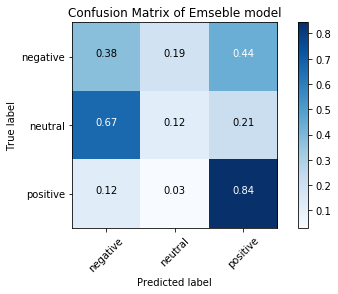

In [65]:
correctCount = 0
wrongCount = 0
for predLabel,trueLabel in zip(y_pred, y_true):
    if predLabel == trueLabel:
        correctCount += 1
    else:
        wrongCount += 1
accuracy = correctCount * 100.0 / (correctCount + wrongCount)        
print("Accuracy:", accuracy )
f1 = f1_score(y_true, predictionClasses, average=None)
print("f1: ", f1)
titleOfConfusionMatrix = "Confusion Matrix of Emseble model"
pt.plot_confusion_matrix_from_labels(y_true, y_pred, titleOfConfusionMatrix)